# Cases by Country

This notebook will download the latests data povided by the Johns Hopkins University Center for Systems Science and Engineering from their GitHub repository.

In [1]:
DATA_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

Pandas is a powerful and easy to use data manipulation library for python.

In [2]:
import pandas as pd

Rule #1: Always look at your data. Here, data is aggregated at the country or region level for some countries and at the province or state level for others.

In [3]:
data = pd.read_csv(DATA_URL)
data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,23,23,23,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,103,103,103,103,104,104,104,104,105,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994


We no not need the latitude and longitude data, so we drop the Lat and Long columns.

In [4]:
data = data.drop(axis=1, labels=["Lat", "Long"])
data.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
1,NaN,Albania,0,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256


Countries that had province-level data will appear multiple times. Sum the values to get one row per country.

In [5]:
data = data.groupby("Country/Region").sum()
data.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
Albania,0,0,0,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
Algeria,0,0,0,0,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
Andorra,0,0,0,0,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780
Armenia,0,0,0,0,0,0,0,0,0,0,...,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677
Australia,0,0,0,0,4,5,5,6,9,9,...,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694


The groupby operation turned the country names into an index, now we only need to convert the column titles into proper dates.

In [6]:
data.columns = [pd.to_datetime(column).date() for column in data.columns]
data.head(3)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
Albania,0,0,0,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
Algeria,0,0,0,0,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256


Adding a new column for each new date is a somewhat strange decision that the authors of this dataset made. In general, the number of columns should be constant and rows should be added as the dataset grows. Let's transpose the dataset and make sure it is ordered by date.

In [7]:
data = data.T
data = data.sort_index()
data.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-21,1092,609,2811,717,24,23,3031,1401,6645,14873,...,130172,535,1678,285,268,466,6,1,70,28
2020-04-22,1176,634,2910,723,25,24,3144,1473,6652,14925,...,134638,543,1716,288,268,474,6,1,74,28
2020-04-23,1279,663,3007,723,25,24,3435,1523,6662,15002,...,139246,557,1758,311,268,480,6,1,76,28
2020-04-24,1351,678,3127,731,25,24,3607,1596,6677,15071,...,144640,563,1804,318,270,484,6,1,84,29
2020-04-25,1463,712,3256,738,25,24,3780,1677,6694,15148,...,149569,596,1862,323,270,342,6,1,84,31


Plotting requires very little setup in Jupyter. The matplotlib magic function takes care of everything.

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now we can use Pandas' built-in plot functions to visualize the data. A simple plot() without any parameters works, but we obviously need to reduce the amount of data in the plot. The legend is many times larger than the plot and individual countries are barely recognizable.

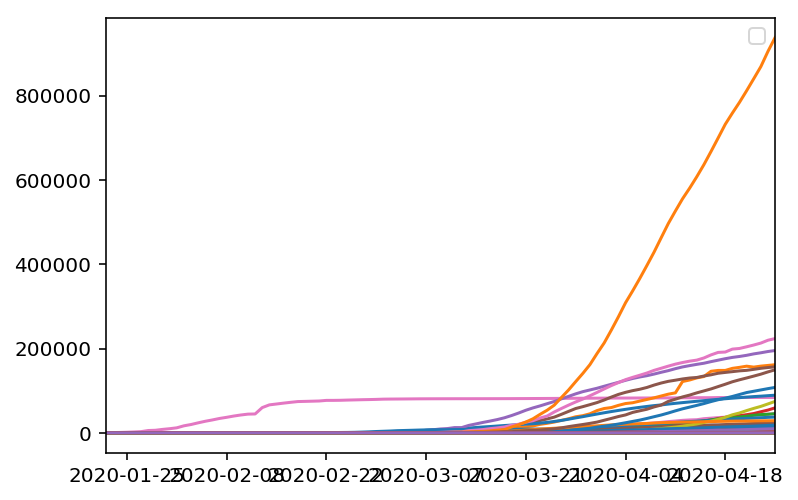

In [9]:
plot = data.plot()
plot.legend([]) # Legend would hide data

For a single country, plot() works well enough, though there is something wrong with the labels on the x axis. They are not evenly spaced and overlapping.

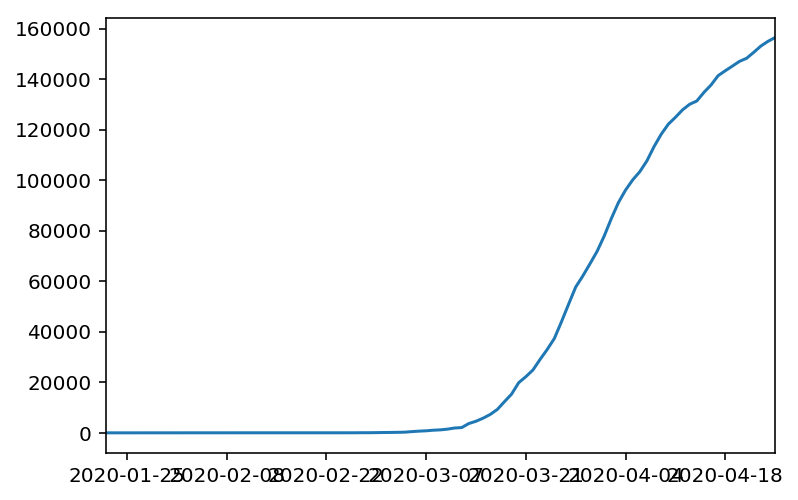

In [10]:
ax = data["Germany"].plot()

To get more control over the layout of the plot, the matplotlib package provides the necessary classes and functions. We need a date formatter that provides a shorter date format and a locator to evenly space the ticks on the x axis.

In [11]:
import matplotlib

formatter = matplotlib.dates.DateFormatter('%m/%d')
locator = matplotlib.ticker.AutoLocator() 

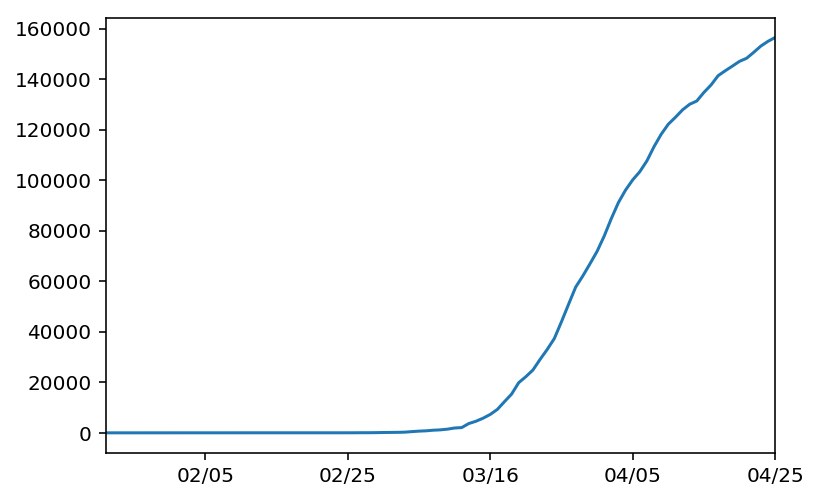

In [12]:
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
ax.figure

Plotting multiple countries will automatically add a legend.

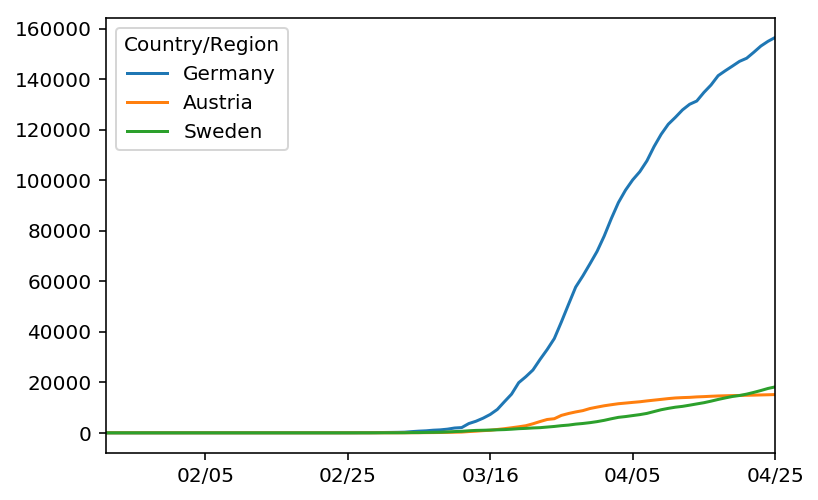

In [13]:
ax = data[["Germany", "Austria", "Sweden"]].plot()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

Add labels and a title.

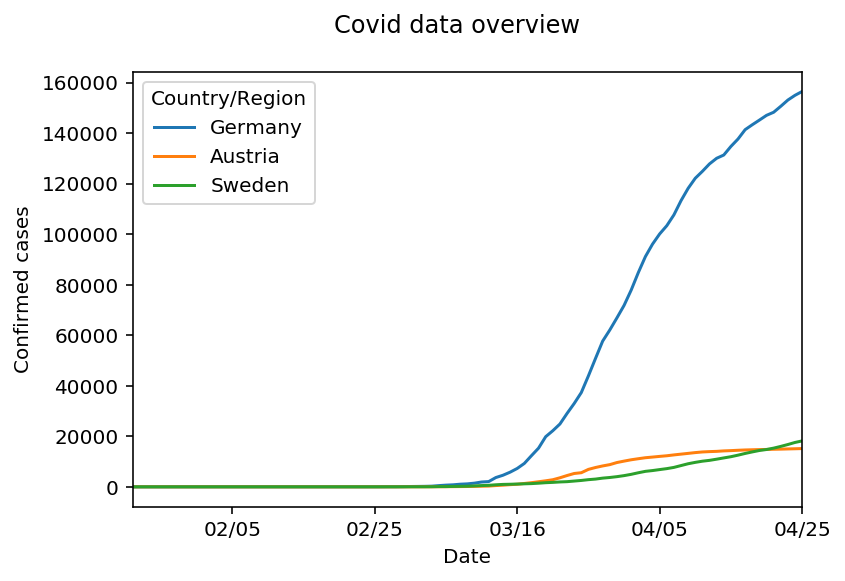

In [14]:
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed cases")
ax.figure.suptitle("Covid data overview")
ax.figure

Add the global sum for comparison

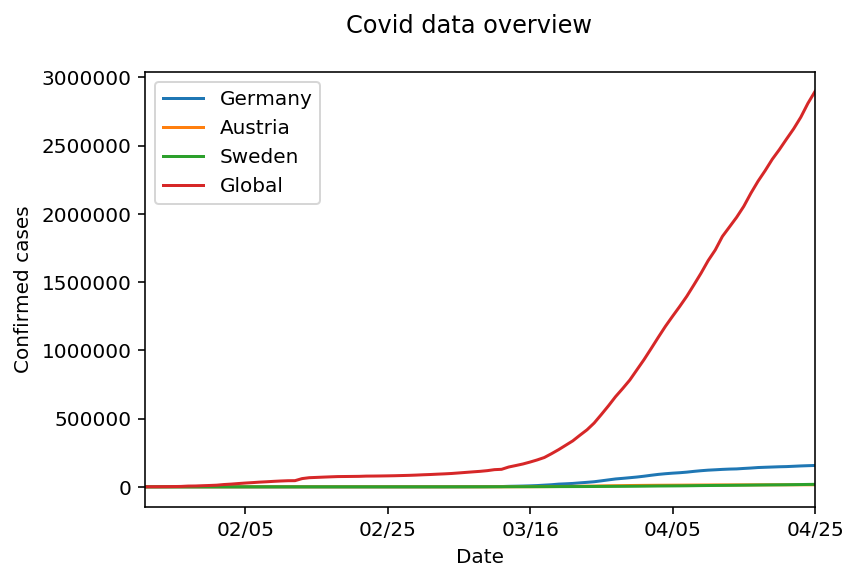

In [15]:
subplot = ax.plot(data.sum(axis=1), label="Global")
ax.legend() # To update the legend
ax.figure

Since we are now dealing with a wide range of values, switch to a logarithmic scale.

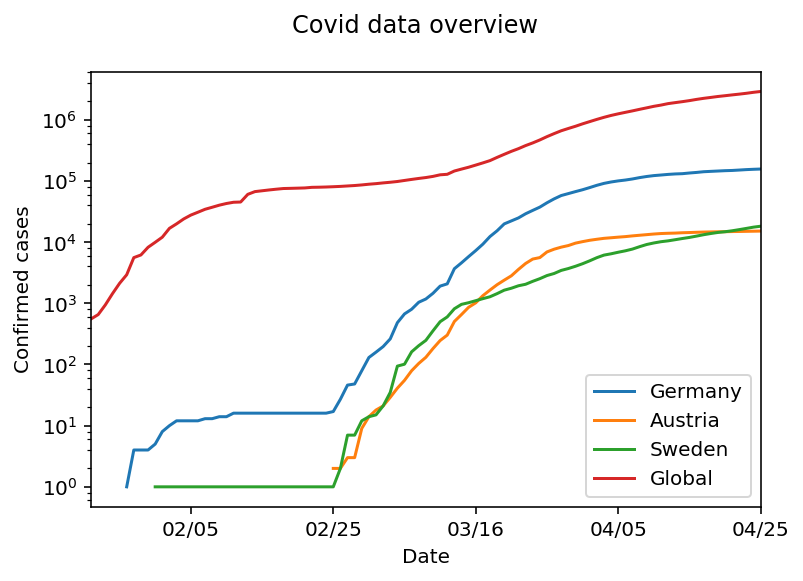

In [16]:
ax.semilogy()
ax.figure

Save the result. Done!

In [17]:
ax.figure.savefig("cases-by-country.pdf")